# 1. Imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, log_loss
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Data EDA & Processing

## 2.1 Dataset Exploration

In [2]:
# Load the data
data = pd.read_csv("./Synthetic_HS_questionnaire_responses.csv")

# Fill missing values
data = data.fillna("Not Specified")  # Replace NaN with a placeholder

# Encode all columns (since all are text)
label_encoder = LabelEncoder()
for col in data.columns:
    data[col] = label_encoder.fit_transform(data[col])


In [3]:
data.head()

,Age,Gender,Occupation,Diagnosis_History,HS_Frequency_Flareups,HS_Severity_Symptoms,Other_Medical_Conditions,Current_Medications,Past_Surgeries,Water_Intake,...,Type_Water_Swimming,Swimming_Effect_HS,Skin_Products_Swimming,Swimming_Comfort,Swimming_Impact_HS,Pregnancy_After_HS,Pregnancy_Symptoms_HS,Pregnancy_Consultations,Postpartum_Changes,Breastfeeding_HS_Management
0,2,2,3,4,3,1,4,4,0,0,...,3,1,2,1,4,1,0,1,5,2
1,2,1,1,1,0,2,0,5,3,3,...,3,2,1,0,0,1,5,4,4,3
2,0,0,4,1,1,2,0,0,4,3,...,0,1,2,0,0,1,0,1,5,3
3,4,1,5,2,3,1,0,5,3,1,...,2,1,2,2,0,1,1,3,3,3
4,4,0,4,0,0,2,2,0,4,1,...,2,3,1,4,5,1,5,3,4,3


## 2.2 Correlation Analysis

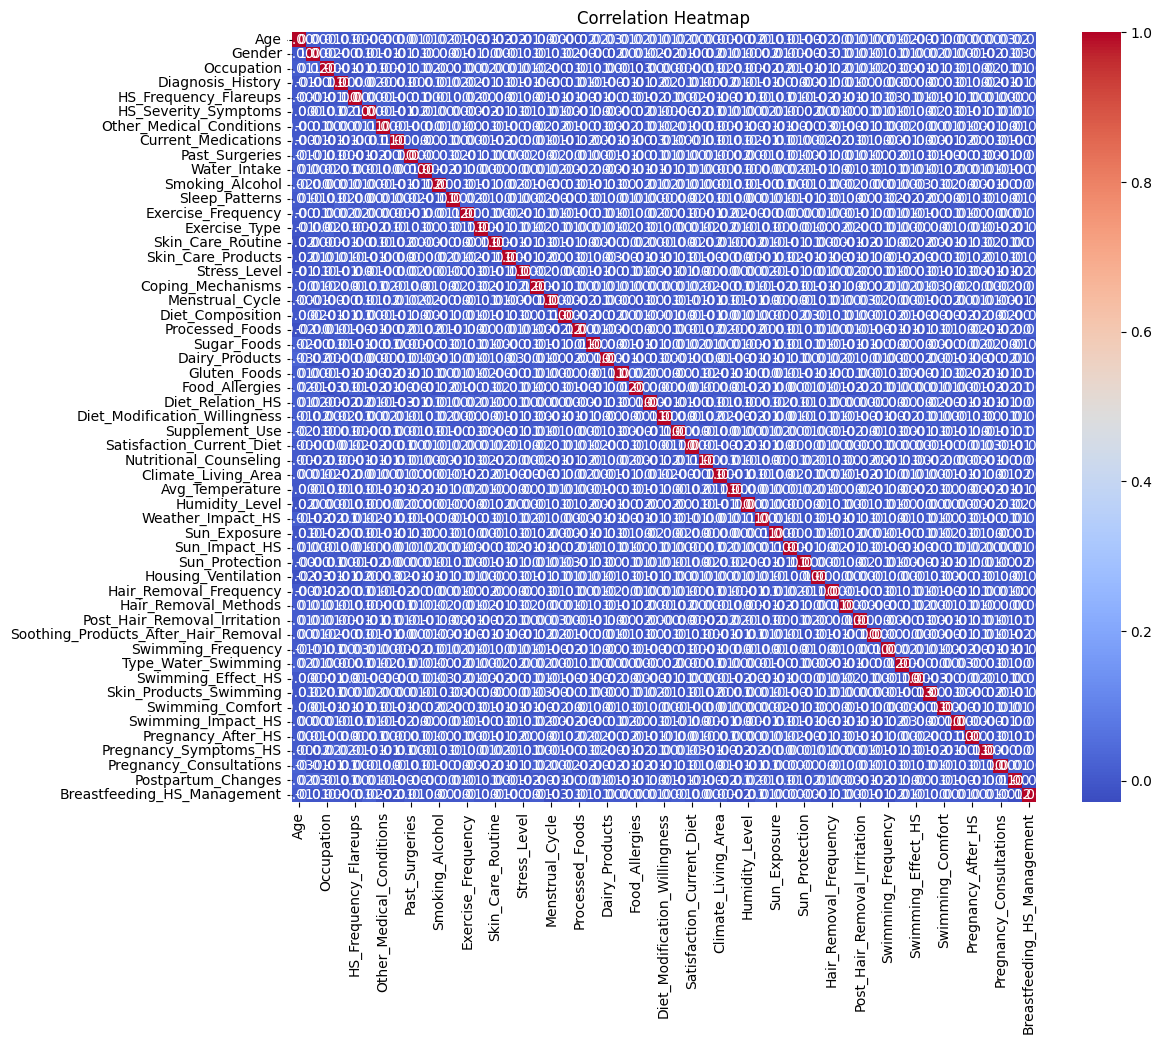

In [4]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [5]:
# Define features and target
X = data.drop(columns=["HS_Frequency_Flareups"])  # Features
y = data["HS_Frequency_Flareups"]  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 2.3 Feature Selection

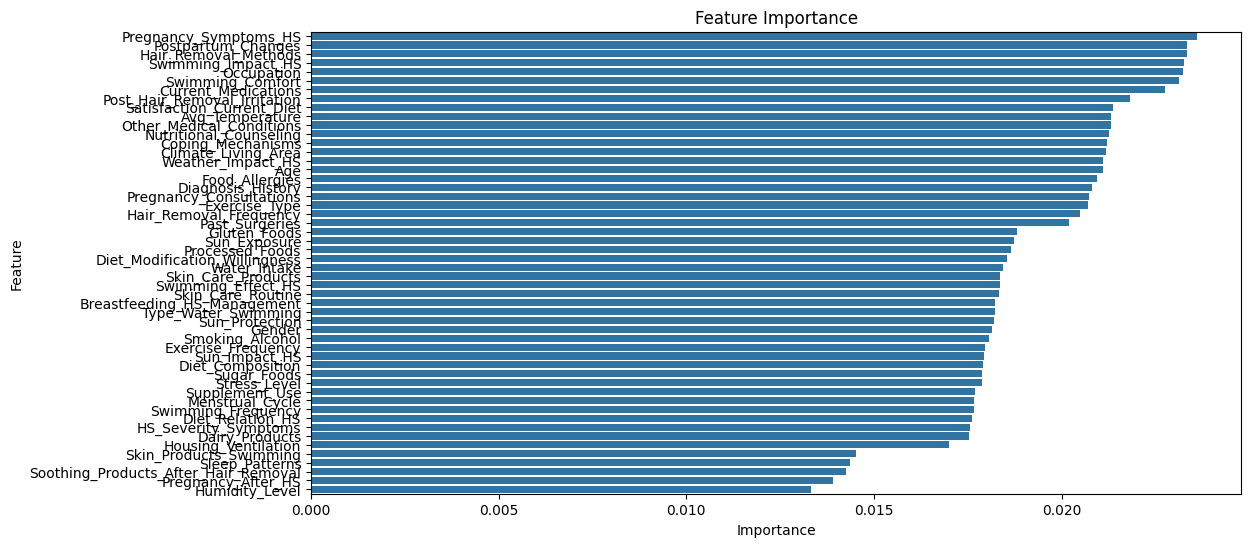

Top Features:
                   Feature  Importance
48  Pregnancy_Symptoms_HS    0.023605
50     Postpartum_Changes    0.023337
38   Hair_Removal_Methods    0.023333
46     Swimming_Impact_HS    0.023264
2              Occupation    0.023232


In [6]:
# Train a Random Forest model to get feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance")
plt.show()

# Print top features
print("Top Features:\n", feature_importances.head())

In [7]:
feature_importances

,Feature,Importance
48,Pregnancy_Symptoms_HS,0.023605
50,Postpartum_Changes,0.023337
38,Hair_Removal_Methods,0.023333
46,Swimming_Impact_HS,0.023264
2,Occupation,0.023232
45,Swimming_Comfort,0.023139
6,Current_Medications,0.022758
39,Post_Hair_Removal_Irritation,0.021819
27,Satisfaction_Current_Diet,0.021378
30,Avg_Temperature,0.021314


In [8]:
# Set a threshold for feature importance
threshold = 0.02

# Filter features based on the threshold
selected_features = feature_importances[feature_importances['Importance'] > threshold]['Feature']
print("Selected Features:\n", selected_features)

# Update the dataset with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

Selected Features:
 48           Pregnancy_Symptoms_HS
50              Postpartum_Changes
38            Hair_Removal_Methods
46              Swimming_Impact_HS
2                       Occupation
45                Swimming_Comfort
6              Current_Medications
39    Post_Hair_Removal_Irritation
27       Satisfaction_Current_Diet
30                 Avg_Temperature
5         Other_Medical_Conditions
28          Nutritional_Counseling
16               Coping_Mechanisms
29             Climate_Living_Area
32               Weather_Impact_HS
0                              Age
23                  Food_Allergies
3                Diagnosis_History
49         Pregnancy_Consultations
12                   Exercise_Type
37          Hair_Removal_Frequency
7                   Past_Surgeries
Name: Feature, dtype: object


## 2.4 Check Dataset Balance

Class Distribution:
 HS_Frequency_Flareups
1    2066
3    2039
0    2008
2    1967
4    1920
Name: count, dtype: int64


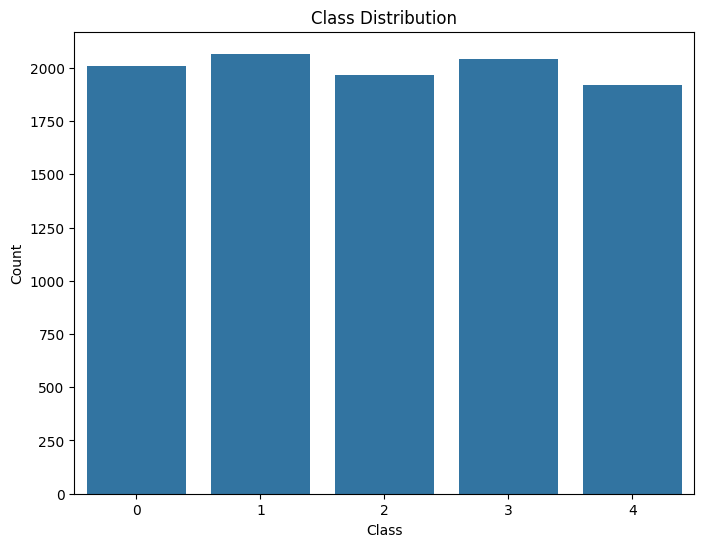

In [9]:
# Check class distribution
class_distribution = y.value_counts()
print("Class Distribution:\n", class_distribution)

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# 3. Training

## 3.1 Decision Tree

### 3.1.1 Train With all features

In [10]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

### 3.1.2 Train with selected features

In [11]:
# Decision Tree
dt_model_selected = DecisionTreeClassifier(random_state=42)
dt_model_selected.fit(X_train_selected, y_train)

DecisionTreeClassifier(random_state=42)

## 3.2 Random Forest

### 3.2.1 Train with all features

In [12]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### 3.2.2 Train with selected features

In [13]:
# Random Forest
rf_model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=42)

## 3.3 XGBoost

### 3.3.1 Train with all Features

In [14]:
# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)



/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [14:55:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

### 3.3.2 Train with selected features

In [15]:
# XGBoost
xgb_model_selected = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model_selected.fit(X_train_selected, y_train)



/opt/anaconda3/envs/hsproject/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [14:55:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

# 4. Results

## 4.1 Decision Tree

### 4.1.1 With all features

In [16]:
dt_preds = dt_model.predict(X_test)

In [17]:
print("Accuracy:", accuracy_score(y_test, dt_preds))


Accuracy: 0.194


In [18]:
print("Classification Report:\n", classification_report(y_test, dt_preds))


Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.22      0.21       398
           1       0.19      0.17      0.18       421
           2       0.19      0.22      0.20       384
           3       0.17      0.17      0.17       408
           4       0.21      0.20      0.20       389

    accuracy                           0.19      2000
   macro avg       0.19      0.19      0.19      2000
weighted avg       0.19      0.19      0.19      2000



Confusion Matrix:
 [[87 81 85 86 59]
 [85 72 84 98 82]
 [79 78 83 67 77]
 [90 85 89 70 74]
 [76 68 86 83 76]]


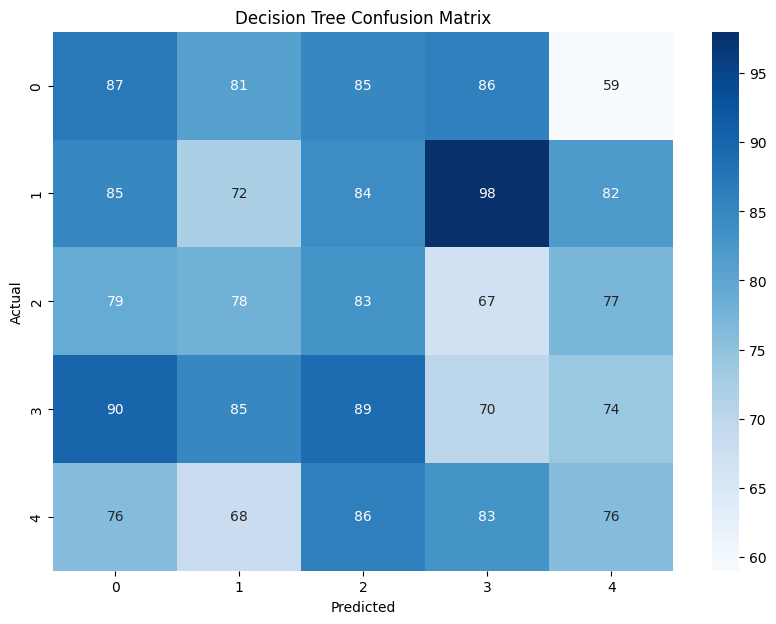

In [19]:
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_preds))

# plotting confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, dt_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Decision Tree ROC-AUC: 0.49651914693256505


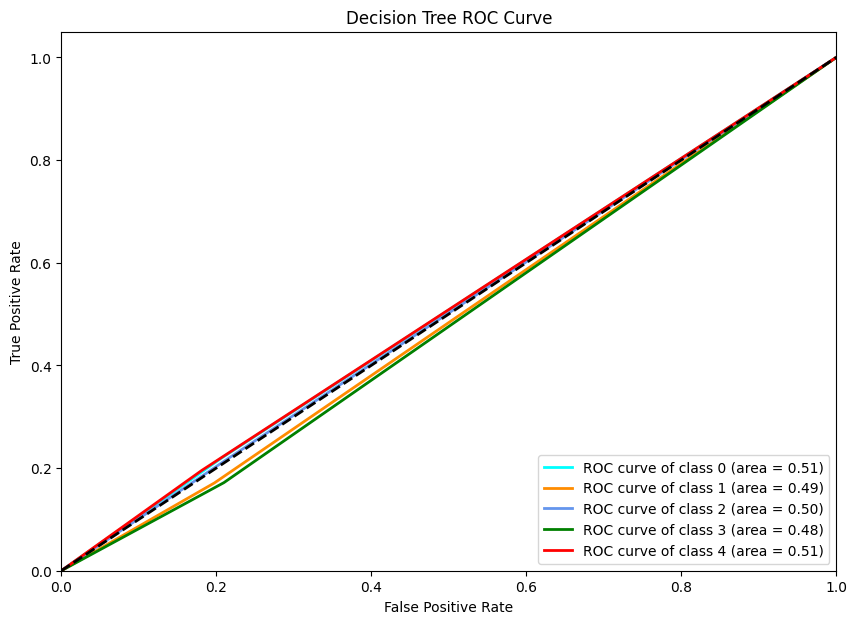

In [20]:
from sklearn.metrics import roc_curve, auc

dt_roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test), multi_class='ovr')

print("Decision Tree ROC-AUC:", dt_roc_auc)

# plotting ROC curve

# Compute ROC curve and ROC area for each class
n_classes = len(set(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_binarized = pd.get_dummies(y_test)  # Binarize the output
y_score = dt_model.predict_proba(X_test)  # Predicted probabilities

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized.iloc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 7))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [21]:
# Calculate cross-entropy loss for Decision Tree
dt_cross_entropy_loss = log_loss(y_test, dt_model.predict_proba(X_test))
print("Decision Tree Cross-Entropy Loss:", dt_cross_entropy_loss)

Decision Tree Cross-Entropy Loss: 29.05118463162842


### 4.1.2 With selected features

In [22]:
dt_preds_selected = dt_model_selected.predict(X_test_selected)

print("Accuracy:", accuracy_score(y_test, dt_preds_selected))

dt_roc_auc_selected = roc_auc_score(y_test, dt_model_selected.predict_proba(X_test_selected), multi_class='ovr')

print("Decision Tree ROC-AUC_selected:", dt_roc_auc_selected)

print("Classification Report:\n", classification_report(y_test, dt_preds_selected))


Accuracy: 0.1985
Decision Tree ROC-AUC_selected: 0.49896356968969224
Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.17      0.17       398
           1       0.21      0.20      0.20       421
           2       0.17      0.17      0.17       384
           3       0.22      0.23      0.22       408
           4       0.21      0.23      0.22       389

    accuracy                           0.20      2000
   macro avg       0.20      0.20      0.20      2000
weighted avg       0.20      0.20      0.20      2000



Confusion Matrix:
 [[68 86 82 88 74]
 [80 83 72 88 98]
 [89 82 64 71 78]
 [90 67 73 92 86]
 [67 78 81 73 90]]


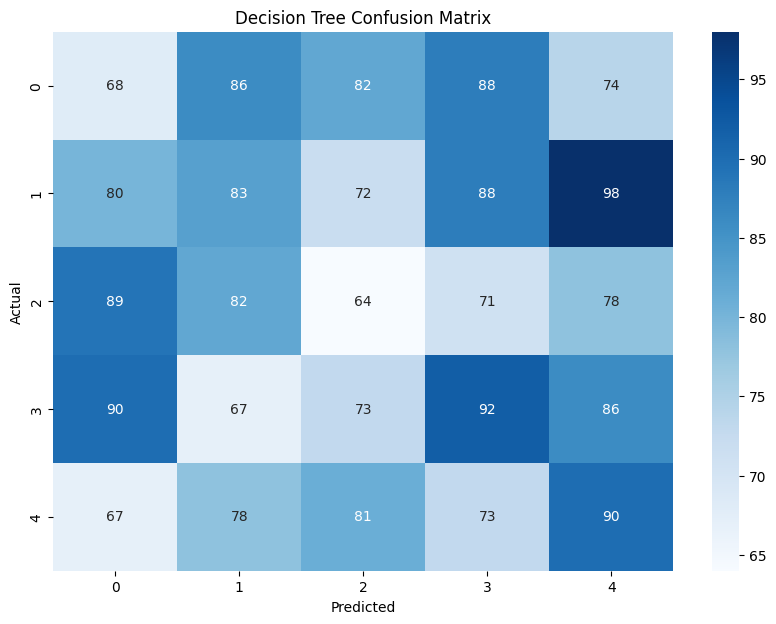

In [23]:
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_preds_selected))

# plotting confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, dt_preds_selected), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [24]:
# Calculate cross-entropy loss for Decision Tree
dt_cross_entropy_loss_selected = log_loss(y_test, dt_model_selected.predict_proba(X_test_selected))
print("Decision Tree Cross-Entropy Loss:", dt_cross_entropy_loss_selected)

Decision Tree Cross-Entropy Loss: 28.888988191377393


## 4.2 Random Forest

### 4.2.1 With all features

In [25]:
rf_preds = rf_model.predict(X_test)

In [26]:
print("Accuracy:", accuracy_score(y_test, rf_preds))


Accuracy: 0.203


In [27]:
print("Classification Report:\n", classification_report(y_test, rf_preds))


Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.26      0.23       398
           1       0.22      0.25      0.23       421
           2       0.18      0.17      0.17       384
           3       0.23      0.23      0.23       408
           4       0.16      0.10      0.12       389

    accuracy                           0.20      2000
   macro avg       0.20      0.20      0.20      2000
weighted avg       0.20      0.20      0.20      2000



Confusion Matrix:
 [[103  95  64  88  48]
 [105 105  73  85  53]
 [ 87  97  66  81  53]
 [104  85  79  94  46]
 [ 90 106  89  66  38]]


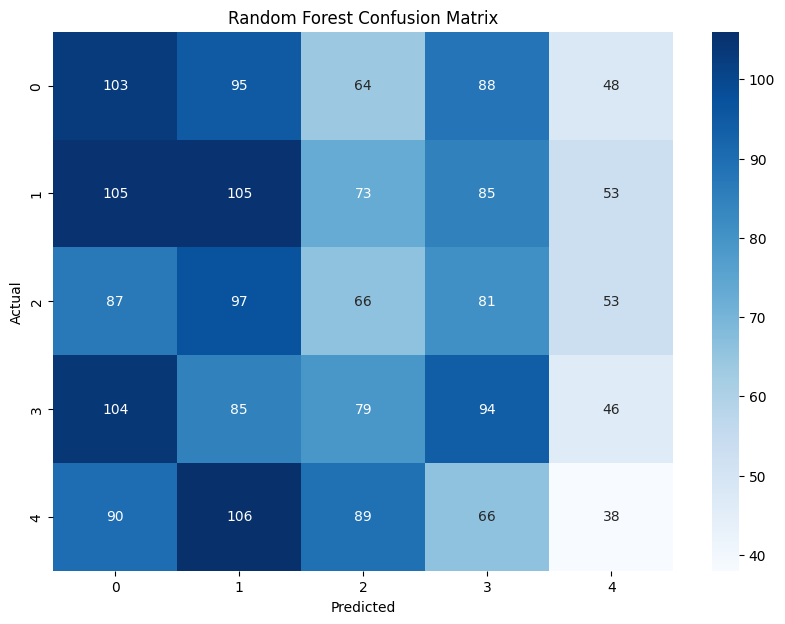

In [28]:
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))

# plotting confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Random Forest ROC-AUC: 0.5028995943705843


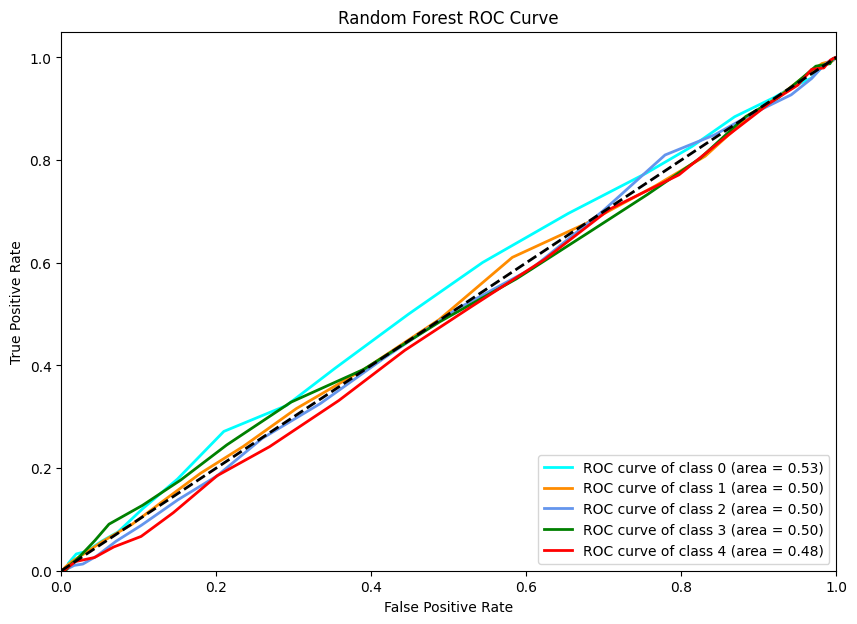

In [29]:
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test), multi_class='ovr')

print("Random Forest ROC-AUC:", rf_roc_auc)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_binarized = pd.get_dummies(y_test)  # Binarize the output
y_score = rf_model.predict_proba(X_test)  # Predicted probabilities

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized.iloc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 7))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [30]:
# Calculate cross-entropy loss for Random Forest
rf_cross_entropy_loss = log_loss(y_test, rf_model.predict_proba(X_test))
print("Random Forest Cross-Entropy Loss:", rf_cross_entropy_loss)

Random Forest Cross-Entropy Loss: 1.6315263297317038


### 4.2.2 With selected features

Accuracy: 0.21
Random Forest ROC-AUC_selected: 0.4982528586490531
Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.30      0.28       398
           1       0.20      0.21      0.20       421
           2       0.22      0.22      0.22       384
           3       0.18      0.18      0.18       408
           4       0.19      0.13      0.16       389

    accuracy                           0.21      2000
   macro avg       0.21      0.21      0.21      2000
weighted avg       0.21      0.21      0.21      2000

Confusion Matrix:
 [[120  88  70  72  48]
 [ 87  90  81  99  64]
 [ 73  87  85  89  50]
 [102 103  71  73  59]
 [ 88  90  82  77  52]]


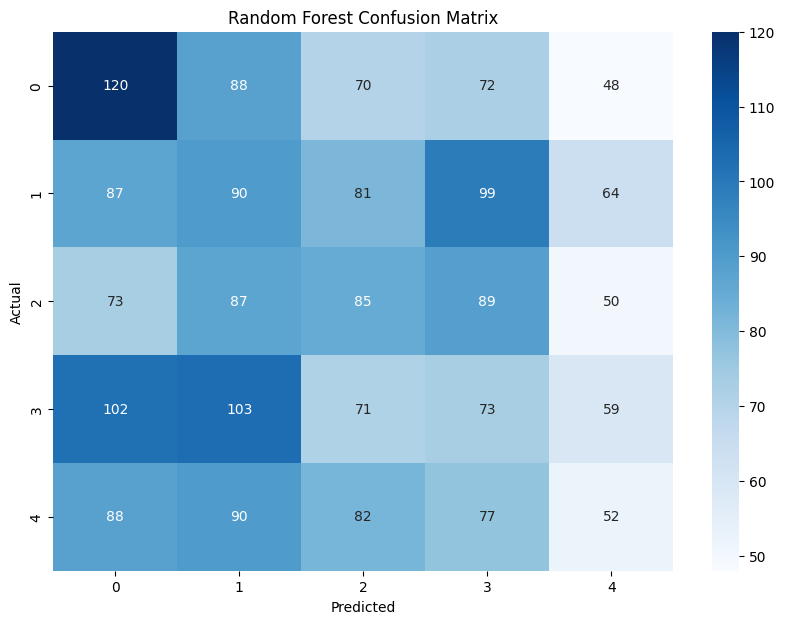

In [31]:
rf_preds_selected = rf_model_selected.predict(X_test_selected)

print("Accuracy:", accuracy_score(y_test, rf_preds_selected))

rf_roc_auc_selected = roc_auc_score(y_test, rf_model_selected.predict_proba(X_test_selected), multi_class='ovr')
print("Random Forest ROC-AUC_selected:", rf_roc_auc_selected)

print("Classification Report:\n", classification_report(y_test, rf_preds_selected))

print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds_selected))

# plotting confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, rf_preds_selected), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [32]:
# Calculate cross-entropy loss for Random Forest
rf_cross_entropy_loss_selected = log_loss(y_test, rf_model_selected.predict_proba(X_test_selected))
print("Random Forest Cross-Entropy Loss:", rf_cross_entropy_loss_selected)

Random Forest Cross-Entropy Loss: 1.6412208107976445


## 4.3 XGBoost

### 4.3.1 With all features

In [33]:
xgb_preds = xgb_model.predict(X_test)

In [34]:
print("Accuracy:", accuracy_score(y_test, xgb_preds))


Accuracy: 0.189


In [35]:
print("Classification Report:\n", classification_report(y_test, xgb_preds))


Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.19      0.19       398
           1       0.19      0.19      0.19       421
           2       0.19      0.20      0.20       384
           3       0.20      0.20      0.20       408
           4       0.19      0.16      0.17       389

    accuracy                           0.19      2000
   macro avg       0.19      0.19      0.19      2000
weighted avg       0.19      0.19      0.19      2000



Confusion Matrix:
 [[77 90 78 93 60]
 [92 80 91 88 70]
 [89 78 77 77 63]
 [81 85 78 81 83]
 [90 92 74 70 63]]


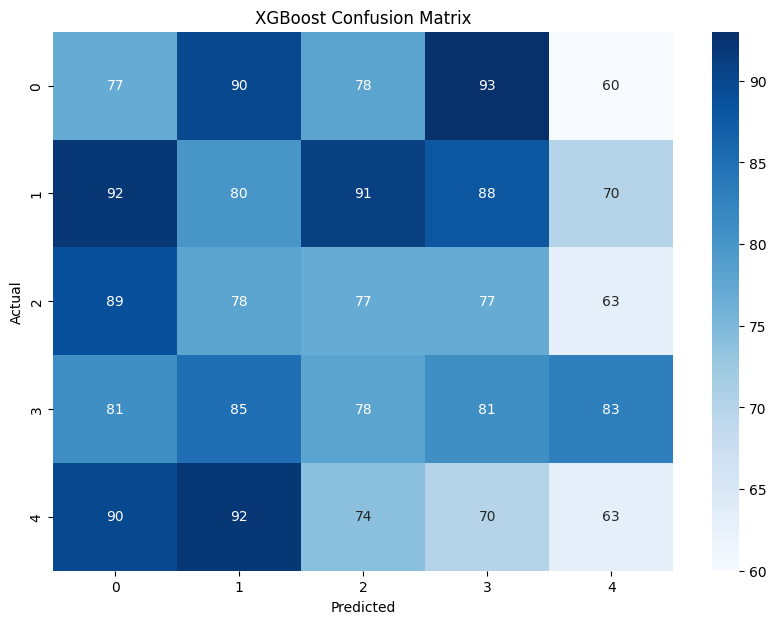

In [36]:
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_preds))

# plotting confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, xgb_preds), annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

XGBoost ROC-AUC: 0.49449907464617826


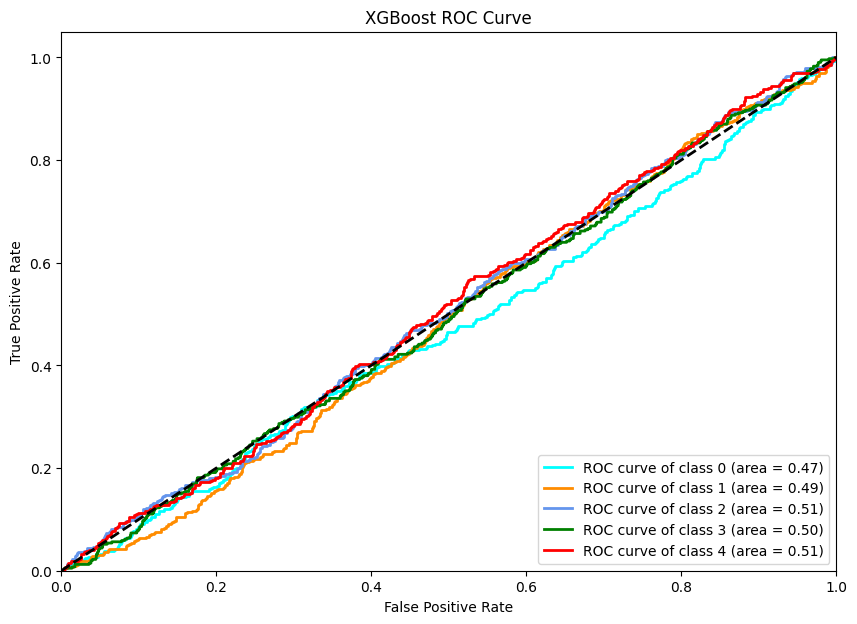

In [37]:
xgb_roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test), multi_class='ovr')

print("XGBoost ROC-AUC:", xgb_roc_auc)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_binarized = pd.get_dummies(y_test)  # Binarize the output
y_score = xgb_model.predict_proba(X_test)  # Predicted probabilities

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized.iloc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 7))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [38]:
# Calculate cross-entropy loss for XGBoost
xgb_cross_entropy_loss = log_loss(y_test, xgb_model.predict_proba(X_test))
print("XGBoost Cross-Entropy Loss:", xgb_cross_entropy_loss)

XGBoost Cross-Entropy Loss: 1.8462457630375366


### 4.3.2 With selected features

Accuracy: 0.2005
XGBoost ROC-AUC_selected: 0.49268981859614663
Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.24      0.24       398
           1       0.19      0.20      0.20       421
           2       0.18      0.17      0.18       384
           3       0.20      0.20      0.20       408
           4       0.21      0.18      0.19       389

    accuracy                           0.20      2000
   macro avg       0.20      0.20      0.20      2000
weighted avg       0.20      0.20      0.20      2000

Confusion Matrix:
 [[ 97  87  70  79  65]
 [ 79  85  99  89  69]
 [ 82  83  67  88  64]
 [ 87 109  60  82  70]
 [ 79  80  80  80  70]]


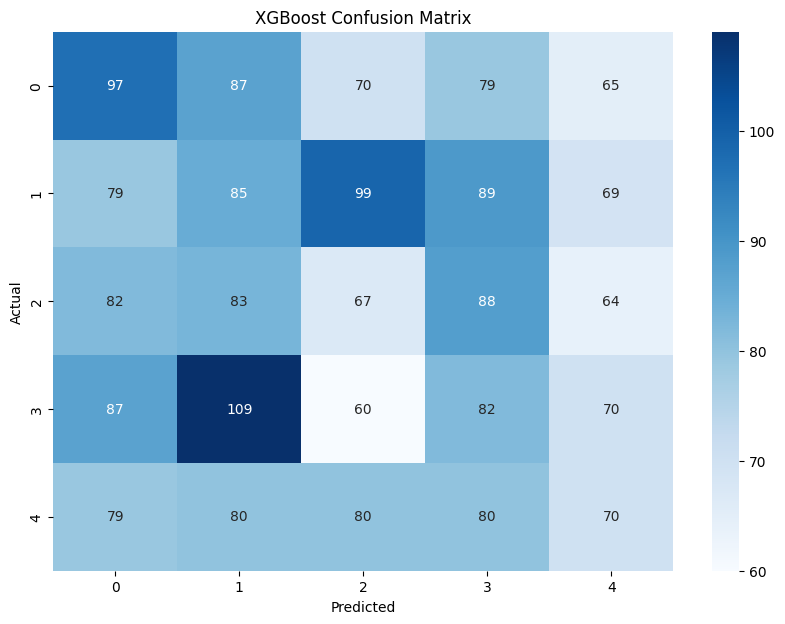

In [39]:
xgb_preds_selected = xgb_model_selected.predict(X_test_selected)

print("Accuracy:", accuracy_score(y_test, xgb_preds_selected))

xgb_roc_auc_selected = roc_auc_score(y_test, xgb_model_selected.predict_proba(X_test_selected), multi_class='ovr')
print("XGBoost ROC-AUC_selected:", xgb_roc_auc_selected)

print("Classification Report:\n", classification_report(y_test, xgb_preds_selected))

print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_preds_selected))

# plotting confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, xgb_preds_selected), annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [40]:
# Calculate cross-entropy loss for XGBoost
xgb_cross_entropy_loss_selected = log_loss(y_test, xgb_model_selected.predict_proba(X_test_selected))
print("XGBoost Cross-Entropy Loss:", xgb_cross_entropy_loss_selected)

XGBoost Cross-Entropy Loss: 1.8662835171373007


# 4.4 All-in-one Comparison

           Model  Accuracy   ROC-AUC
0  Decision Tree     0.194  0.496519
1  Random Forest     0.203  0.502900
2        XGBoost     0.189  0.494499


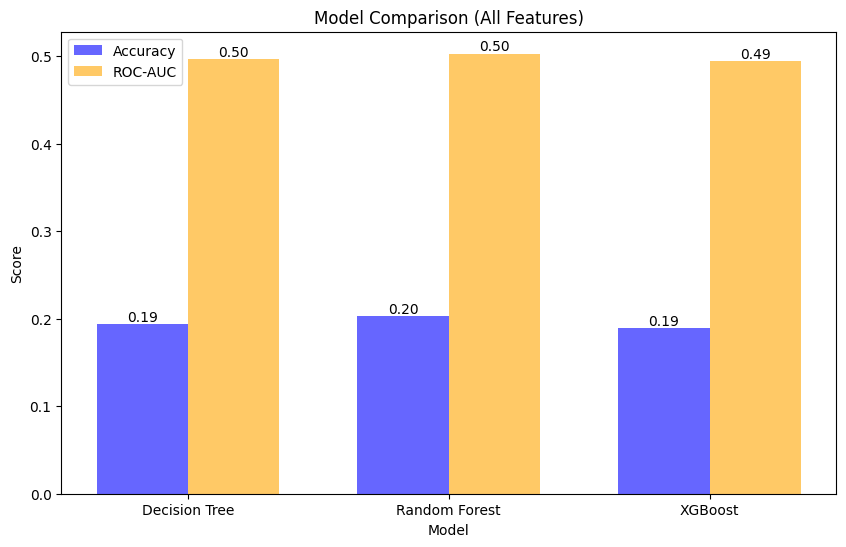

In [50]:
# Compare models with all features
models = {
    "Decision Tree": {"preds": dt_preds, "roc_auc": dt_roc_auc,},
    "Random Forest": {"preds": rf_preds, "roc_auc": rf_roc_auc},
    "XGBoost": {"preds": xgb_preds, "roc_auc": xgb_roc_auc},
}

comparison_results = []

for model_name, metrics in models.items():
    accuracy = accuracy_score(y_test, metrics["preds"])
    roc_auc = metrics["roc_auc"]
    comparison_results.append({"Model": model_name, "Accuracy": accuracy, "ROC-AUC": roc_auc})

# Convert results to a DataFrame for better visualization
comparison_df = pd.DataFrame(comparison_results)

# Display comparison
print(comparison_df)
# Plot comparison with side-by-side bars for Accuracy and ROC-AUC
plt.figure(figsize=(10, 6))

# Set bar width
bar_width = 0.35

# Set positions for bars
r1 = range(len(comparison_df))
r2 = [x + bar_width for x in r1]

# Plot Accuracy
bars1 = plt.bar(r1, comparison_df["Accuracy"], color="blue", width=bar_width, label="Accuracy", alpha=0.6)

# Plot ROC-AUC
bars2 = plt.bar(r2, comparison_df["ROC-AUC"], color="orange", width=bar_width, label="ROC-AUC", alpha=0.6)

# Add values on top of each bar
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')

# Add labels and title
plt.title("Model Comparison (All Features)")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks([r + bar_width / 2 for r in range(len(comparison_df))], comparison_df["Model"])
plt.legend()
plt.show()

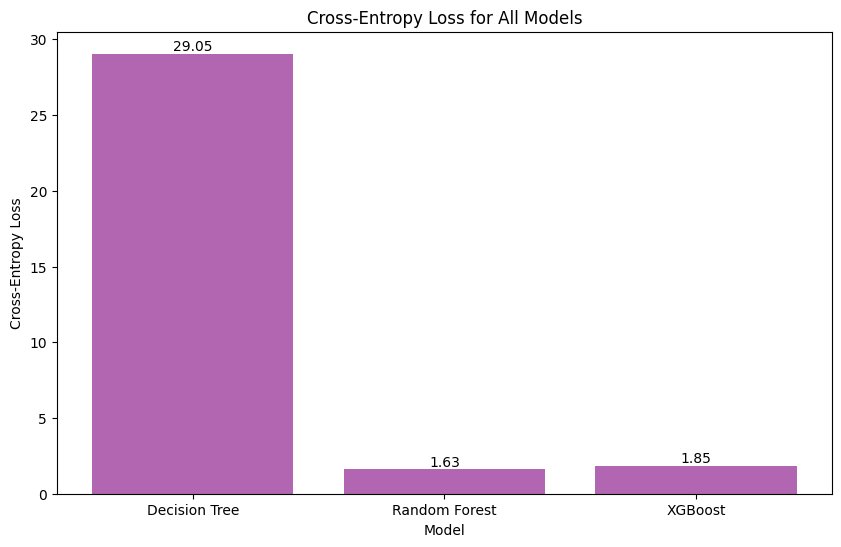

In [49]:
# Plot the cross-entropy loss for all models
cross_entropy_losses = {
    "Decision Tree": dt_cross_entropy_loss,
    "Random Forest": rf_cross_entropy_loss,
    "XGBoost": xgb_cross_entropy_loss,
}
cross_entropy_df = pd.DataFrame(list(cross_entropy_losses.items()), columns=["Model", "Cross-Entropy Loss"])
plt.figure(figsize=(10, 6))
bars = plt.bar(cross_entropy_df["Model"], cross_entropy_df["Cross-Entropy Loss"], color="purple", alpha=0.6)

# Add values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.title("Cross-Entropy Loss for All Models")
plt.xlabel("Model")
plt.ylabel("Cross-Entropy Loss")
plt.show()

                               Model  Accuracy   ROC-AUC
0  Decision Tree (Selected Features)    0.1985  0.498964
1  Random Forest (Selected Features)    0.2100  0.498253
2        XGBoost (Selected Features)    0.2005  0.492690


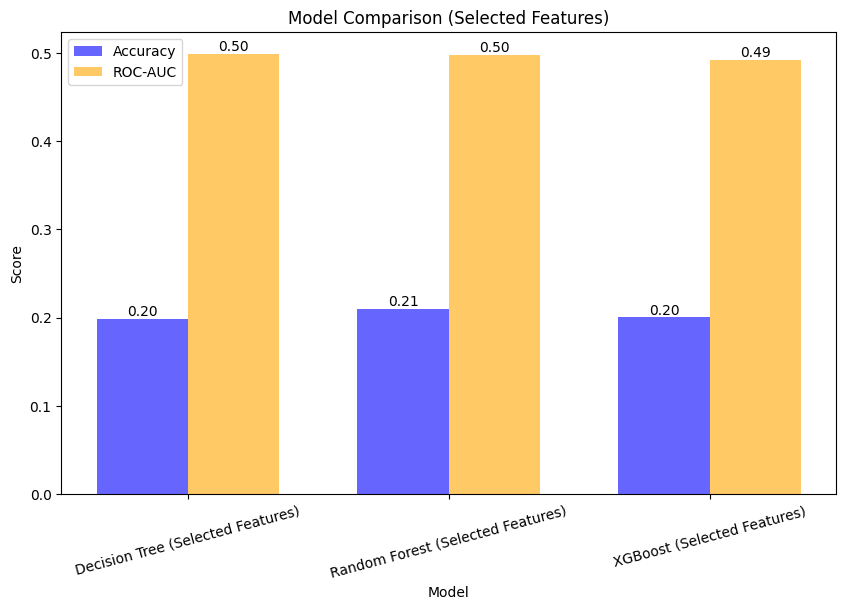

In [48]:
# Compare models with selected features
selected_models = {
    "Decision Tree (Selected Features)": {"preds": dt_preds_selected, "roc_auc": dt_roc_auc_selected},
    "Random Forest (Selected Features)": {"preds": rf_preds_selected, "roc_auc": rf_roc_auc_selected},
    "XGBoost (Selected Features)": {"preds": xgb_preds_selected, "roc_auc": xgb_roc_auc_selected},
}

selected_comparison_results = []

for model_name, metrics in selected_models.items():
    accuracy = accuracy_score(y_test, metrics["preds"])
    roc_auc = metrics["roc_auc"]
    selected_comparison_results.append({"Model": model_name, "Accuracy": accuracy, "ROC-AUC": roc_auc})

# Convert results to a DataFrame for better visualization
selected_comparison_df = pd.DataFrame(selected_comparison_results)

# Display comparison
print(selected_comparison_df)

# Plot comparison with side-by-side bars for Accuracy and ROC-AUC
plt.figure(figsize=(10, 6))

# Set bar width
bar_width = 0.35

# Set positions for bars
r1 = range(len(selected_comparison_df))
r2 = [x + bar_width for x in r1]

# Plot Accuracy
bars1 = plt.bar(r1, selected_comparison_df["Accuracy"], color="blue", width=bar_width, label="Accuracy", alpha=0.6)

# Plot ROC-AUC
bars2 = plt.bar(r2, selected_comparison_df["ROC-AUC"], color="orange", width=bar_width, label="ROC-AUC", alpha=0.6)

# Add values on top of each bar
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')

# Add labels and title
plt.title("Model Comparison (Selected Features)")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks([r + bar_width / 2 for r in range(len(selected_comparison_df))], selected_comparison_df["Model"], rotation=15)
plt.legend()
plt.show()

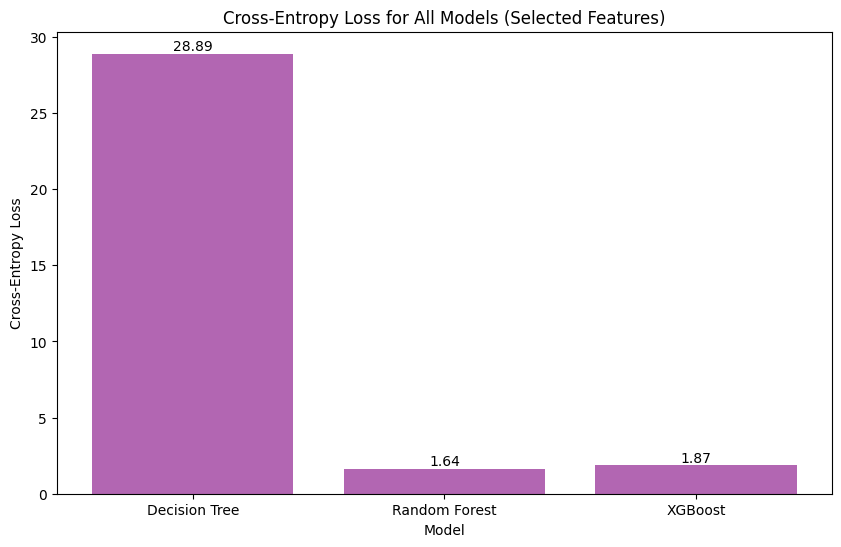

In [47]:
# plot the cross-entropy loss for all models
cross_entropy_losses = {
    "Decision Tree": dt_cross_entropy_loss_selected,
    "Random Forest": rf_cross_entropy_loss_selected,
    "XGBoost": xgb_cross_entropy_loss_selected,
}
cross_entropy_df_selected = pd.DataFrame(list(cross_entropy_losses.items()), columns=["Model", "Cross-Entropy Loss"])
plt.figure(figsize=(10, 6))
bars = plt.bar(cross_entropy_df_selected["Model"], cross_entropy_df_selected["Cross-Entropy Loss"], color="purple", alpha=0.6)

# Add values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.title("Cross-Entropy Loss for All Models (Selected Features)")
plt.xlabel("Model")
plt.ylabel("Cross-Entropy Loss")
plt.show()